# Potato Disease Prediction Model 
Using Google Image Data Generator API

#### Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print("Libraries Imported Successfully")

Libraries Imported Successfully


In [2]:
# Variables
IMAGE_SIZE = 256
CHANNELS = 3

## Train Image Data Generator

In [3]:
# Image Data Geerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="AugmentedImages"
)

Found 1506 images belonging to 3 classes.


In [4]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [8]:
count=0
for image_batch, label_batch in train_generator:
    print(image_batch.shape)
#     print(image_batch[0])
    break

(32, 256, 256, 3)


In [9]:
count=0
for image_batch, label_batch in train_generator:
#     print(image_batch.shape)
    print(image_batch[0])
    break

[[[0.5690848  0.494575   0.51810443]
  [0.57042193 0.49591208 0.51944155]
  [0.5717589  0.49724916 0.52077854]
  ...
  [0.57352775 0.4950964  0.5303905 ]
  [0.5848017  0.5063703  0.5416644 ]
  [0.5860313  0.50759995 0.54289407]]

 [[0.56031436 0.48580453 0.50933397]
  [0.5589773  0.48446748 0.5079969 ]
  [0.5576402  0.4831304  0.5066598 ]
  ...
  [0.57382494 0.4953935  0.5306877 ]
  [0.58495027 0.5065189  0.541813  ]
  [0.585957   0.5075256  0.54281974]]

 [[0.6188772  0.5443674  0.5678968 ]
  [0.6180601  0.5435503  0.5670797 ]
  [0.617243   0.5427332  0.5662626 ]
  ...
  [0.574122   0.49569064 0.53098476]
  [0.58509886 0.50666744 0.5419616 ]
  [0.5858827  0.50745136 0.5427455 ]]

 ...

 [[0.62822187 0.56939834 0.5890062 ]
  [0.59684634 0.53802276 0.5576306 ]
  [0.6541481  0.5953246  0.6149324 ]
  ...
  [0.5796057  0.512939   0.5443116 ]
  [0.57975423 0.5130876  0.5444601 ]
  [0.5799028  0.51323617 0.5446087 ]]

 [[0.625102   0.56627846 0.5858863 ]
  [0.60004044 0.5412169  0.56082475]


## Test Image Data Generator

In [10]:
# Test Image Data
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 431 images belonging to 3 classes.


## Validation Image Data Generator

In [11]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


# CNN Model

## Model Building

In [12]:
#Model
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape), # New Layer
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

Metal device set to: Apple M1


### Model Summary

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

### Compiling the Model
Using ADAM optimizer 

In [16]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

## Training Model

In [17]:
# steps per epoch
1506/32

47.0625

In [18]:
# Validation Step
215/32

6.71875

In [19]:
# Training Model 
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20


2023-04-07 11:54:52.011316: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


47/47 [==============================] - 38s 781ms/step - loss: 0.9165 - accuracy: 0.4807 - val_loss: 0.8664 - val_accuracy: 0.4948
Epoch 2/20
47/47 [==============================] - 37s 787ms/step - loss: 0.7310 - accuracy: 0.6404 - val_loss: 0.5335 - val_accuracy: 0.7656
Epoch 3/20
47/47 [==============================] - 36s 769ms/step - loss: 0.4294 - accuracy: 0.8161 - val_loss: 0.4125 - val_accuracy: 0.8333
Epoch 4/20
47/47 [==============================] - 37s 781ms/step - loss: 0.3123 - accuracy: 0.8792 - val_loss: 0.3718 - val_accuracy: 0.8333
Epoch 5/20
47/47 [==============================] - 55s 1s/step - loss: 0.2968 - accuracy: 0.8847 - val_loss: 0.3770 - val_accuracy: 0.8438
Epoch 6/20
47/47 [==============================] - 36s 769ms/step - loss: 0.2636 - accuracy: 0.8915 - val_loss: 0.2646 - val_accuracy: 0.8646
Epoch 7/20
47/47 [==============================] - 36s 771ms/step - loss: 0.2145 - accuracy: 0.9220 - val_loss: 0.2824 - val_accuracy: 0.9167
Epoch 8/20
47

## Model Accuracy

In [20]:
scores = model.evaluate(test_generator)

14/14 [==============================] - 4s 229ms/step - loss: 0.1408 - accuracy: 0.9513


In [21]:
scores

[0.14079131186008453, 0.9512761235237122]

## Plotting Accuracy and Loss Curve

In [22]:
history

In [23]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [24]:
type(history.history['loss'])

list

In [25]:
len(history.history['loss'])

20

In [26]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.9164724946022034,
 0.730998694896698,
 0.42935097217559814,
 0.3122970163822174,
 0.2967887818813324]

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [28]:
val_acc

[0.4947916567325592,
 0.765625,
 0.8333333134651184,
 0.8333333134651184,
 0.84375,
 0.8645833134651184,
 0.9166666865348816,
 0.8541666865348816,
 0.9114583134651184,
 0.9166666865348816,
 0.9010416865348816,
 0.96875,
 0.9010416865348816,
 0.96875,
 0.9322916865348816,
 0.9270833134651184,
 0.7760416865348816,
 0.9739583134651184,
 0.8229166865348816,
 0.984375]

In [29]:
acc

[0.48071807622909546,
 0.640434205532074,
 0.8161465525627136,
 0.8792401552200317,
 0.8846675753593445,
 0.8914518356323242,
 0.9219809770584106,
 0.9294437170028687,
 0.9409769177436829,
 0.9470827579498291,
 0.9409769177436829,
 0.9525101780891418,
 0.9518317580223083,
 0.9721845388412476,
 0.9640434384346008,
 0.9674355387687683,
 0.9620081186294556,
 0.9504749178886414,
 0.9497964978218079,
 0.9606512784957886]

## Graph

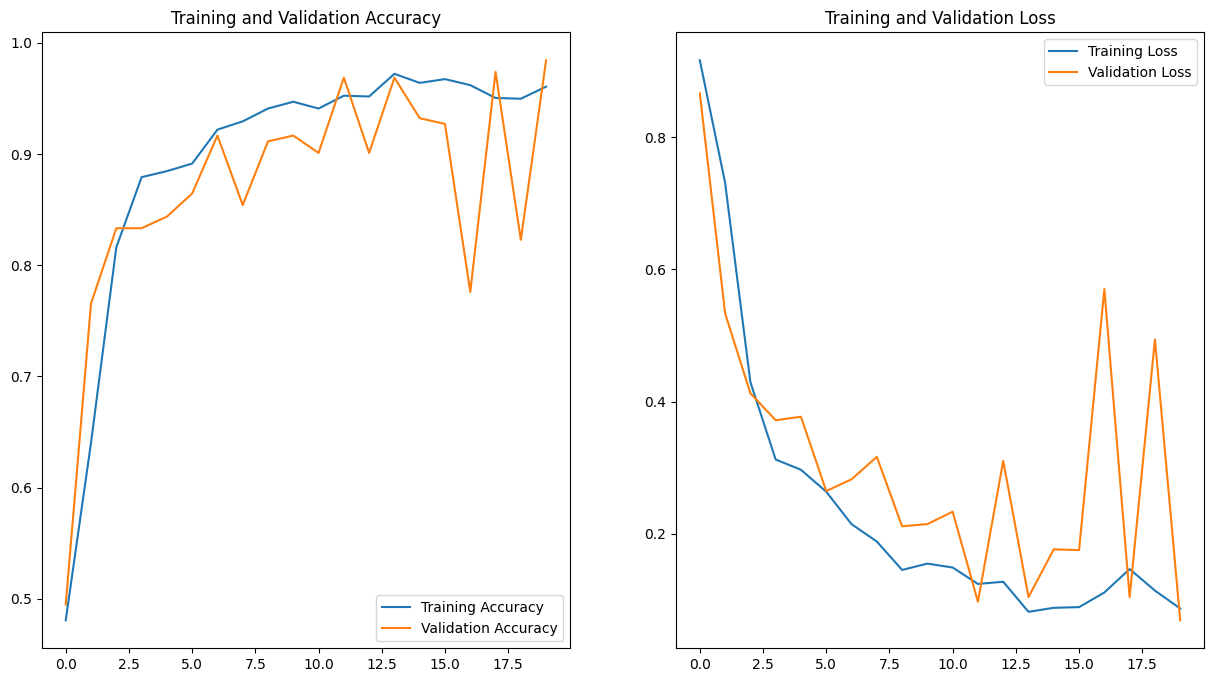

In [32]:
EPOCHS = 20

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Prediction on Sample Image

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 0s 112ms/step
predicted label: Potato___Early_blight


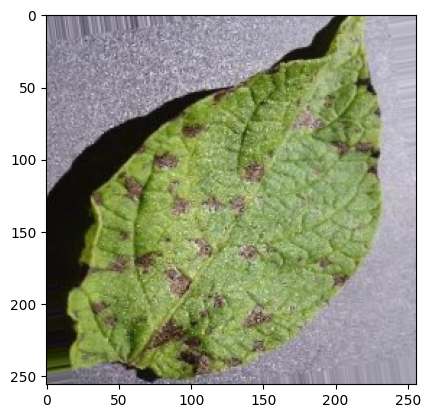

In [36]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

## Function for Inference

In [37]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

# Inference on Sample Images

1/1 [==============================] - 0s 11ms/step


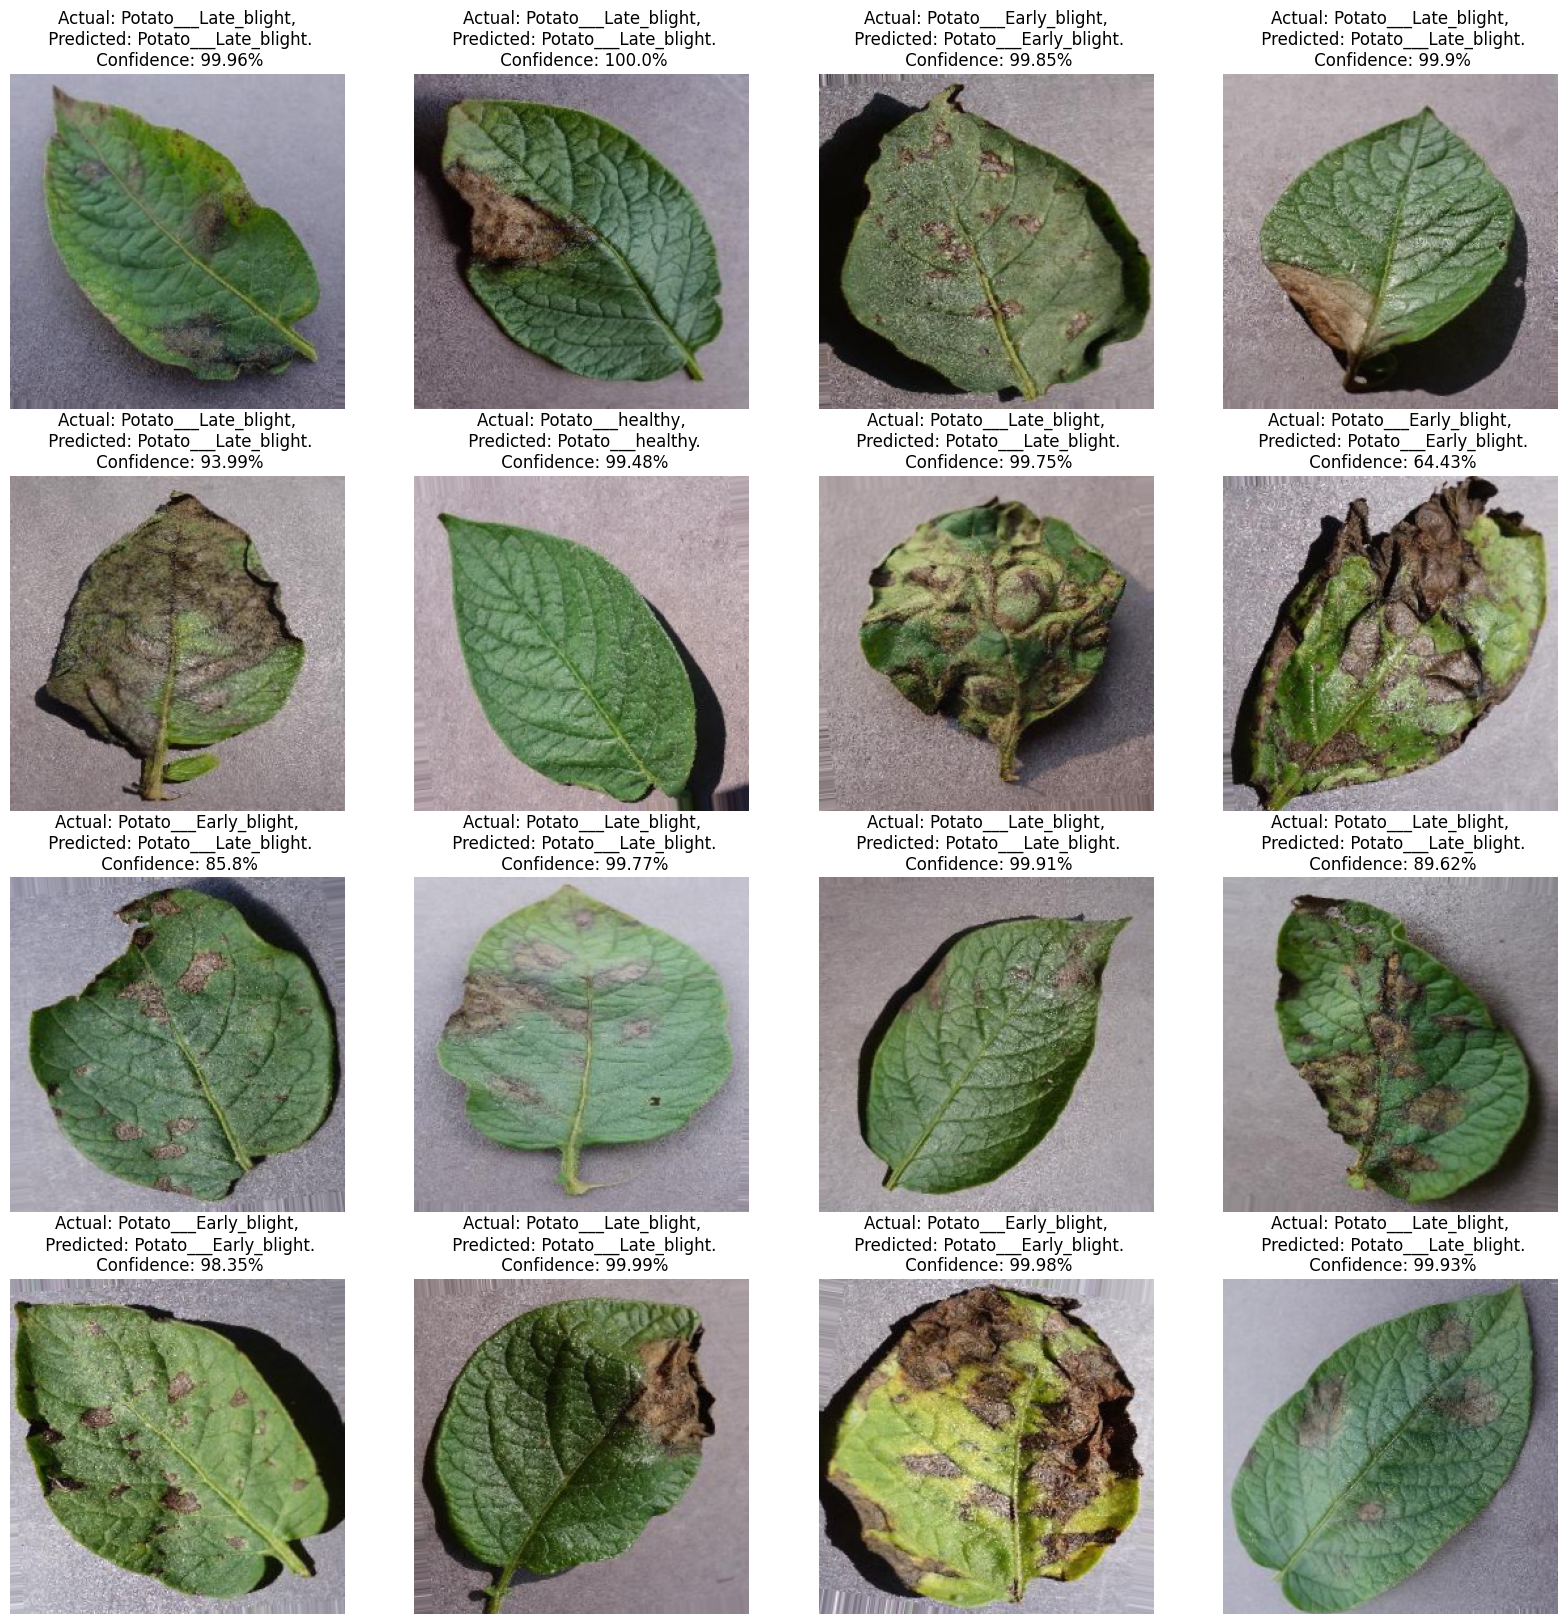

In [40]:
plt.figure(figsize=(20, 20))
for images, labels in test_generator:
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

## Saving Model

In [41]:
model.save("../Newpotatoes.h5")